## Data Science Discovering Structure and Opportunity via Network Modeling 
![](images/twittercloud.jpg)

In [1]:
###lets take a peek 
import requests
import html
from IPython.display import display, HTML, IFrame
screen_name = "Sysco"
html_template = html.escape(requests.get('https://twitter.com/{}'.format(screen_name)).text)
display(HTML("<iframe srcdoc='{}' height='600' width='1000'>".format(html_template)))

## What the profile page looks like to a computer using API (Application Programming Interface)

In [2]:

###get profile page
import sys
import os
import importlib
sys.path.insert(0,"twitterpackage/Chap02_03")
#print(sys.path)
#print(os.environ)

from twitter_client import get_twitter_client
import json
client = get_twitter_client()
profile = client.get_user(screen_name="Sysco")
print(json.dumps(profile._json, indent =4))

{
    "id": 823523768,
    "id_str": "823523768",
    "name": "Sysco Corporation",
    "screen_name": "Sysco",
    "location": "Houston, Texas",
    "profile_location": null,
    "description": "Sysco, the leader in foodservice distribution, partners with restaurants and professional chefs to deliver the good things that make great dining experiences.",
    "url": "http://t.co/mfQ4JM4gcU",
    "entities": {
        "url": {
            "urls": [
                {
                    "url": "http://t.co/mfQ4JM4gcU",
                    "expanded_url": "http://www.Sysco.com",
                    "display_url": "Sysco.com",
                    "indices": [
                        0,
                        22
                    ]
                }
            ]
        },
        "description": {
            "urls": []
        }
    },
    "protected": false,
    "followers_count": 12232,
    "friends_count": 451,
    "listed_count": 192,
    "created_at": "Fri Sep 14 15:52:11 +0000 2012

## Lets look at some basic questions relating to Sysco
* ### What topics are being Tweeted on the Front page this year?
* ### How Wide is the Social Media Reach of Sysco?
* ### Who are the influencers in their social media network?


In [3]:
# !python twitterpackage/Chap02_03/twitter_get_user.py Sysco
# !python ./twitterpackage/Chap02_03/twitter_get_user_timeline_daterange.py --username Sysco --startdate 2018-01-01

In [4]:
###what hashtag topics are on Sysco's mind?
!python twitterpackage/Chap02_03/twitter_hashtag_frequency.py user_timeline_Sysco.jsonl

pizzaexpo2018: 4
mothersday: 2
stpatricksday: 2
homefires: 1
nationalempanadaday: 1
empanadas: 1
breakfast: 1
nationalgrilledcheesemonth: 1
nationaltaterday: 1
zucchininoodles: 1
cauliflowerrice: 1
lettucewraps: 1
tacotuesday: 1
nationalchipanddipday: 1
syscopizza: 1
westafrican: 1
brunch: 1
jademountain: 1
didyouknow: 1
nationalnoodlemonth: 1
nationalpeanutbutterloversday: 1
syscoces: 1
valentinesday2018: 1
friedfish: 1
cuttingedgesolutions: 1
chinesenewyear: 1
nationalpizzaday: 1
nationalsnackfoodmonth: 1
marinelife: 1
pizza: 1
porticoseafood: 1
buckheadbeef: 1
best: 1


In [5]:
!python twitterpackage/Chap02_03/twitter_followers_stats.py Sysco

----- Timing -----
Initialize data: 0.587989091873169
Set-based operations: 0.2622530460357666
Total time: 0.8502421379089355
----- Stats -----
Sysco has 12009 followers
Sysco has 452 friends
Sysco has 283 mutual friends
169 friends are not following Sysco back
11726 followers are not followed back by Sysco
Some mutual friends: MOZOShoes, SarahE_Scully, NoKidHungryNY, MichaelRamsingh, gracecunning


In [6]:
####Generate Mutual Friend Network
####These are the interconnections
import os
import sys
import json
import time
import math
from tweepy import Cursor
from twitter_client import get_twitter_client
import sys
import json
from random import sample
import sys
import json
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
import urllib
import requests
import html

Refresh = False
Target = 'Sysco'
if Refresh == True:
    followers_file = 'users/{}/followers.jsonl'.format(Target)
    friends_file = 'users/{}/friends.jsonl'.format(Target)
    with open(followers_file) as f1, open(friends_file) as f2:
        t0 = time.time()
        followers = []
        friends = []
        for line in f1:
            profile = json.loads(line)
            followers.append(profile['screen_name'])
        for line in f2:
            profile = json.loads(line)
            friends.append(profile['screen_name'])
        t1 = time.time()
        mutual_friends = [user for user in friends if user in followers]
        followers_not_following = [user for user in followers if user not in friends]
        friends_not_following = [user for user in friends if user not in followers]
        t2 = time.time()
        print("Building Mutual Friend Network for {} Who Has {} Mutual Friends".format(Target, len(mutual_friends)))

    #mutual_friends = mutual_friends[:5]
    G = nx.DiGraph()
    for mutual in mutual_friends:
        #G.add_edge(screen_name,mutual)
        #G.add_edge(mutual,screen_name)
        G.add_node(mutual)

    ###Link the mutual friends network to Sysco
    for mutual in mutual_friends:
        screen_name = mutual
        followers_file = 'users/{}/followers.jsonl'.format(screen_name)
        friends_file = 'users/{}/friends.jsonl'.format(screen_name)
        try:
            with open(followers_file) as f1, open(friends_file) as f2:
                followers = []
                friends = []
                for line in f1:
                    profile = json.loads(line)
                    followers.append(profile['screen_name'])
                ###Add to the NetworkX Graph those that are connected
                followers_in_network = list(set(followers).intersection(mutual_friends))
                for u in followers_in_network:
                    G.add_edge(u,screen_name)
                print("{} followers in network for {}".format(len(followers_in_network),screen_name))

                for line in f2:
                    profile = json.loads(line)
                    friends.append(profile['screen_name'])
                ###Add to the NetworkX Graph those that are connected
                friends_in_network = list(set(friends).intersection(mutual_friends))
                for u in friends_in_network:
                    G.add_edge(screen_name,u)
                print("{} friends in network for {}".format(len(friends_in_network),screen_name))
        except OSError:
            print("no file there for {}, removing node".format(screen_name))
            G.remove_node(screen_name)
    nx.write_gpickle(G,"networkX{}.gpickle".format(Target))
else:
    G = nx.read_gpickle("networkX{}.gpickle".format(Target))

displaylabel = {n:'@' + n for n in G.nodes()}

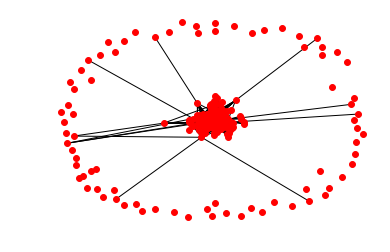

In [7]:
import matplotlib as mpl
import visJS2jupyter.visJS_module

#Create network layout for visualizations
pos = nx.spring_layout(G , scale= 1)

plt.axis("off")
nx.draw_networkx(G, pos = pos, with_labels = False, arrows=False, node_size = 35)

In [9]:
nodes = G.nodes()
edges = list(G.edges())
nodes_dict = [{"id":n,
               "color":'black',
              "title": displaylabel[n],
               "displaylabel":n,
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

edges_dict = [{"source":node_map[edges[i][0]], 
               "target":node_map[edges[i][1]], 
              "color":"gray"
              } for i in range(len(edges))]

# set some network-wide styles
NodeGraph = visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          node_label_field='displaylabel',
                          node_size_multiplier=10,
                          node_size_transform = '',
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_label_field='label',
                          edge_title_field='title',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id = 1)

NodeGraph

In [34]:
###lets find the most central 5 members in the network
###using betweenness centrality
bt = nx.betweenness_centrality(G)
nx.set_node_attributes(G, name='betweenness', values=bt)
nx.set_node_attributes(G, name='size', values=5)
nx.set_node_attributes(G, name='color', values="black")

###number of influencers to identify
top = 5
max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]

influencerlabel = displaylabel

for max_key, max_val in max_nodes:
    G.node[max_key]['size'] = 15
    G.node[max_key]['color'] = 'yellow'
    html_template = html.escape(requests.get('https://twitter.com/{}'.format(max_key)).text)
    influencerlabel[max_key] = "<iframe srcdoc='{}' height='600' width='800'>".format(html_template)
    

color = nx.get_node_attributes(G,'color')
size = nx.get_node_attributes(G,'size')


nodes = G.nodes()
edges = list(G.edges())
nodes_dict = [{"id":n,
               "color":color[n],
              "title": influencerlabel[n],
              #"displaylabel":n,
              "degree":size[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

edges_dict = [{"source":node_map[edges[i][0]], 
               "target":node_map[edges[i][1]], 
              "color":"gray"
              } for i in range(len(edges))]

# set some network-wide styles
NodeGraphInfluencer = visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                          tooltip_delay=300,
                          node_label_field='displaylabel',
                          node_size_multiplier=10,
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_label_field='label',
                          edge_title_field='title',
                          edge_width=3,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id = 2)

NodeGraphInfluencer

In [35]:
import community

Gc = G.to_undirected()
parts = community.best_partition(Gc)
ranges = list(set([parts.get(node) for node in Gc.nodes()]))

nx.set_node_attributes(Gc, name='community', values=parts)
nx.set_node_attributes(Gc, name='size', values=5)

influencerlabel = displaylabel
for c in ranges:
    bunches = [k for k,v in nx.get_node_attributes(Gc,name='community').items() if v == c]
    if len(bunches) > 1:
        bt = nx.betweenness_centrality(G.subgraph(bunches))
        ###number of influencers to identify
        top = 1
        max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
        for max_key, max_val in max_nodes:
            Gc.node[max_key]['size'] = 15
            Gc.node[max_key]['color'] = 'yellow'
            html_template = html.escape(requests.get('https://twitter.com/{}'.format(max_key)).text)
            influencerlabel[max_key] = "<iframe srcdoc='{}' height='600' width='800'>".format(html_template)
            

color = visJS2jupyter.visJS_module.return_node_to_color(Gc,field_to_map='community',cmap=plt.get_cmap("prism"))
size = nx.get_node_attributes(Gc,'size')

nodes = Gc.nodes()
edges = list(Gc.edges())
nodes_dict = [{"id":n,
               "color":color[n],
              "title": influencerlabel[n],
              #"displaylabel":n,
              "degree":size[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000} for n in nodes
              ]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

edges_dict = [{"source":node_map[edges[i][0]], 
               "target":node_map[edges[i][1]], 
              "color":"gray"
              } for i in range(len(edges))]

# set some network-wide styles
NodeGraphInfluencer = visJS2jupyter.visJS_module.visjs_network(nodes_dict,edges_dict,
                           tooltip_delay=300,
                          node_label_field='displaylabel',
                          node_size_multiplier=10,
                          node_color_highlight_border='red',
                          node_color_highlight_background='#D3918B',
                          node_color_hover_border='blue',
                          node_color_hover_background='#8BADD3',
                          node_font_size=25,
                          edge_arrow_to=False,
                          physics_enabled=True,
                          edge_color_highlight='#8A324E',
                          edge_color_hover='#8BADD3',
                          edge_label_field='label',
                          edge_title_field='title',
                          edge_width=1,
                          max_velocity=15,
                          min_velocity=1,
                          graph_id = 3)

NodeGraphInfluencer

ModuleNotFoundError: No module named 'community'